# Sonic The Hedgehog 2 RL

## ACT 1: Import Libraries

In [2]:
import retro
import time
from gym import Env
from gym.spaces import MultiBinary, Box
import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch



import math

%matplotlib inline

In [10]:

-m retro import .

SyntaxError: invalid syntax (3572413935.py, line 1)

## ACT 2: Create custom environment

In [3]:
#Limit Posible Actions
possible_actions = {
    # No Operation
    0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    # Left
    1: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    # Right
    2: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    # Left, Down
    3: [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
    # Right, Down
    4: [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
    # Down
    5: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    # Down, B
    6: [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    # B
    7: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
}

In [4]:
class SonicTheHedgehog2(Env):
    def __init__(self):
        super().__init__()
        #Specify action space and observation space
        self.observation_space = Box(low= 0, 
                                    high=255, 
                                    shape=(84, 84, 1), 
                                    dtype=np.uint8)
        self.action_space = MultiBinary(12)
        # Startup an instance of the game
        self.game = retro.make(game='SonicTheHedgehog2-Genesis', 
                                state='EmeraldHillZone.Act1', 
                                scenario='contest',
                                use_restricted_actions=retro.Actions.FILTERED)

    def reset(self):
        # Return the first frame
        obs = self.game.reset()
        #Current Frame - Previous Frame
        obs = self.preprocess(obs)
        self.previous_frame = obs

        # Create a placeholder attribute to hold the score delta
        self.score = 96
        return obs
    
    def preprocess(self, observation):
        # Grayscaling
        gray = cv2.cvtColor(observation, cv2.COLOR_BGR2GRAY)
        # Resize
        resize = cv2.resize(gray, (84, 84), interpolation=cv2.INTER_CUBIC)
        # Add the channels value
        channels = np.reshape(resize, (84, 84, 1))
        return channels


    def step(self, action):
        # Take a step
        # Recieve the unprocessed items
        obs, reward, done, info = self.game.step(action)
        obs = self.preprocess(obs)

        # Frame Delta
        # Substract previous frame from the Current frame in order to see pixel changes
        frame_delta = obs - self.previous_frame
        self.previous_frame = obs

        #Reshape the reward function TODO
        reward = (info['x'] - self.score) + info['level_end_bonus']
        self.score = info['x']

        return frame_delta, reward, done, info


    def render(self, *args, **kwargs):
        self.game.render()

    def close(self):
        self.game.close()

## ACT 3: Start the game environment

In [8]:
env.close()

In [4]:
env = SonicTheHedgehog2()
print("The size of frame is: ", env.observation_space.shape)
print("No. of Actions: ", env.action_space.n)

obs = env.reset()

done = False

The size of frame is:  (84, 84, 1)
No. of Actions:  12


In [5]:
plt.figure()
plt.imshow(env.reset())
plt.title('Original Frame')
plt.show

NameError: name 'env' is not defined

<Figure size 640x480 with 0 Axes>

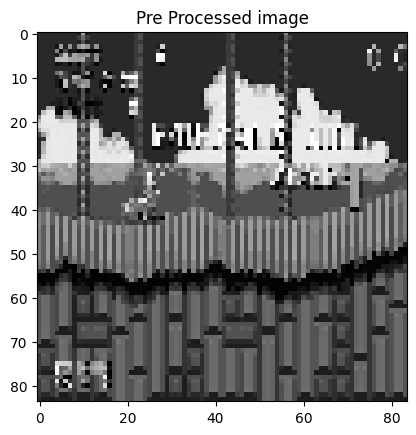

In [6]:
plt.figure()
plt.imshow(cv2.cvtColor(obs, cv2.COLOR_BGR2RGB))
plt.title('Pre Processed image')
plt.show()

In [7]:
score = 0
for game in range(1):
    while not done:
        env.render()
        action = possible_actions[np.random.randint(len(possible_actions))]
        #Takes random desicions
        obs, reward, done, info = env.step(action)
        #time.sleep(0.005)
        score += reward

        if reward > 0:
            print(reward)
            
        if done:
            print("Your Score at the end of the game is: " + score)
            break

    env.reset()
    env.render(close=True)
    env.close()

c:\users\omen\appdata\local\programs\python\python37\lib\site-packages\pyglet\image\codecs\wic.py:406: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
7
8
8
8
7
8
7
7
6
7
6
6
6
6
5
6
5
5
5
5
4
5
4
4
4
5
4
4
5
4
4
5
4
4
4
5
4
4
5
4
4
4
4
3
3
2
2
3
2
2
2
2
2
1
2
2
2
1
2
1
2
1
2
1
1
2
1
2
1
1
2
1
2
1
1
2
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
8
8
8
7
8
8
8
7
7
7
7
6
6
6
6
6
5
6
5
5
5
5
4
5
4
4
4
5
4
4
5
4
4
5
4
4
4
5
4
4
5
4
4
4
5
4
4
5
4
4
4
4
5
5
4
5
5
4
4
4
4
4
4
3
4
3
4
3
3
3
3
3
3
2
3
3
3
3
4
3
3
4
3
4
3
4
3
4
3
4
4
3
4
3
4
3
4
4
3
4
3
4
3
3
4
3
3
3
3
3
3
3
3
3
2
3
2
3
2
2
2
2
2
2
2
2
2
2
1
2
2
2
1
2
2
1
2
2
1
2
2
2
1
2
2
1
2
2
1
2
2
2
1
2
2
1
2
1
2
1
2
1
2
1
1
2
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


TypeError: can only concatenate str (not "int") to str

## ACT 4: Hyperparameter Optimization


In [13]:
# Importing the optimzation frame - HPO
import optuna
# PPO algo for RL
from stable_baselines3 import PPO
# Bring in the eval policy method for metric calculation
from stable_baselines3.common.evaluation import evaluate_policy
# Import the sb3 monitor for logging 
from stable_baselines3.common.monitor import Monitor
# Import the vec wrappers to vectorize and frame stack
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack
# Import os to deal with filepaths
import os

In [14]:
#Log Directory
LOG_DIR = './logs/'
#Where to save the models
OPT_DIR = './opt/'

In [15]:
# Function to return test hyperparameters - define the object function
def optimize_ppo(trial): 
    return {
        'n_steps':trial.suggest_int('n_steps', 2048, 8192),
        'gamma':trial.suggest_loguniform('gamma', 0.8, 0.9999),
        'learning_rate':trial.suggest_loguniform('learning_rate', 1e-5, 1e-4),
        'clip_range':trial.suggest_uniform('clip_range', 0.1, 0.4),
        'gae_lambda':trial.suggest_uniform('gae_lambda', 0.8, 0.99)
    }

In [16]:
SAVE_PATH = os.path.join(OPT_DIR, 'trial_{}_best_model'.format(1))

In [17]:
# Run a training loop and return mean reward 
def optimize_agent(trial):
    try:
        model_params = optimize_ppo(trial) 

        # Create environment 
        env = SonicTheHedgehog2()
        env = Monitor(env, LOG_DIR)
        env = DummyVecEnv([lambda: env])
        env = VecFrameStack(env, 4, channels_order='last')

        # Create algo 
        model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=0, **model_params)
        model.learn(total_timesteps=50)
        #model.learn(total_timesteps=100000)

        # Evaluate model 
        mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=5)
        env.close()

        SAVE_PATH = os.path.join(OPT_DIR, 'trial_{}_best_model'.format(trial.number))
        model.save(SAVE_PATH)

        return mean_reward

    except Exception as e:
        return -1000

In [18]:
# Creating the experiment 
study = optuna.create_study(direction='maximize')
study.optimize(optimize_agent, n_trials=2, n_jobs=1)
#study.optimize(optimize_agent, n_trials=100, n_jobs=1)

[I 2022-11-16 21:27:27,796] A new study created in memory with name: no-name-663b088c-9444-44ed-a6cc-a7810597f1b4
c:\users\omen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  """
c:\users\omen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
c:\users\omen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v

In [19]:
study.best_params

{'n_steps': 7497,
 'gamma': 0.83980068597895,
 'learning_rate': 8.124486694481266e-05,
 'clip_range': 0.30071607767374353,
 'gae_lambda': 0.8225412551643636}

In [20]:
study.best_trial

FrozenTrial(number=0, values=[5954.0], datetime_start=datetime.datetime(2022, 11, 16, 21, 27, 27, 798418), datetime_complete=datetime.datetime(2022, 11, 16, 21, 41, 16, 568863), params={'n_steps': 7497, 'gamma': 0.83980068597895, 'learning_rate': 8.124486694481266e-05, 'clip_range': 0.30071607767374353, 'gae_lambda': 0.8225412551643636}, distributions={'n_steps': IntDistribution(high=8192, log=False, low=2048, step=1), 'gamma': FloatDistribution(high=0.9999, log=True, low=0.8, step=None), 'learning_rate': FloatDistribution(high=0.0001, log=True, low=1e-05, step=None), 'clip_range': FloatDistribution(high=0.4, log=False, low=0.1, step=None), 'gae_lambda': FloatDistribution(high=0.99, log=False, low=0.8, step=None)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=0, state=TrialState.COMPLETE, value=None)

In [16]:
model = PPO.load(os.path.join(OPT_DIR, 'trial_0_best_model.zip'))

## ACT 5: Setup Callback


In [7]:
# Import base callback 
from stable_baselines3.common.callbacks import BaseCallback

In [8]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [9]:
CHECKPOINT_DIR = './train/'

In [10]:
#Check frequency means basically that every 10000 steps we are gonna save the model
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

# ACT 6: Train Model

In [39]:
# Create environment 
env = SonicTheHedgehog2()
env = Monitor(env, LOG_DIR)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order='last')

In [40]:
model_params = study.best_params

In [41]:
model_params

{'n_steps': 7497,
 'gamma': 0.83980068597895,
 'learning_rate': 8.124486694481266e-05,
 'clip_range': 0.30071607767374353,
 'gae_lambda': 0.8225412551643636}

In [42]:
117*64

7488

In [43]:
model_params = study.best_params
model_params['n_steps'] = 7488  # set n_steps to 7488 or a factor of 64
# model_params['learning_rate'] = 5e-7
model_params

{'n_steps': 7488,
 'gamma': 0.83980068597895,
 'learning_rate': 8.124486694481266e-05,
 'clip_range': 0.30071607767374353,
 'gae_lambda': 0.8225412551643636}

In [12]:
model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, **model_params)

NameError: name 'PPO' is not defined

In [45]:
# Reload previous weights from HPO
model.load(os.path.join(OPT_DIR, 'trial_0_best_model.zip'))

In [ ]:
# Kick off training 
model.learn(total_timesteps=1000, callback=callback)
# model.learn(total_timestep=30000) 
# model.learn(total_timestep=5000000) 

# ACT 7: Evaluate the Model


In [11]:
model.load(os.path.join(OPT_DIR, 'trial_0_best_model.zip'))

NameError: name 'model' is not defined

In [6]:
mean_reward, _ = evaluate_policy(model, env, render=True, n_eval_episodes=1)

NameError: name 'evaluate_policy' is not defined

In [ ]:
mean_reward

# ACT 8: Test Model

In [ ]:
obs = env.reset()

In [ ]:
obs.shape

In [ ]:
env.step(model.predict(obs)[0])

In [ ]:
# Reset game to starting state
obs = env.reset()
# Set flag to flase
done = False
for game in range(1): 
    while not done: 
        if done: 
            obs = env.reset()
        env.render()
        action = model.predict(obs)[0]
        obs, reward, done, info = env.step(action)
        time.sleep(0.01)
        print(reward)